In [193]:
# utilities
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_importance, plot_tree

import warnings
warnings.filterwarnings('ignore')

# New Section

In [194]:
eth_df = pd.read_csv('ETH.csv',
                 index_col='Date',
                 infer_datetime_format=True,
                 parse_dates=True
)

In [195]:
display(eth_df.head())
display(eth_df.tail())

,Number_of_tweet,exchange,open,high,low,close,volume,trade_count,vwap,symbol,nasdaq,spx,Ethereum Market Cap,Next_day_price
Date,,,,,,,,,,,,,,
2016-06-17,37,CBSE,15.64,15.74,14.13,14.60,6899.290510,359,14.936590,ETHUSD,4800.34,2071.22,1.249053e+09,21.14
2016-06-20,9,CBSE,11.44,11.99,11.20,11.92,6151.775498,616,11.619042,ETHUSD,4837.21,2083.25,9.596000e+08,12.09
2016-06-21,10,CBSE,11.70,13.89,11.50,13.89,25919.715150,1191,12.374604,ETHUSD,4843.76,2088.90,1.055029e+09,11.92
2016-06-22,10,CBSE,13.18,13.59,13.01,13.31,9132.150628,782,13.292151,ETHUSD,4833.32,2085.45,1.035382e+09,13.89
2016-06-24,5,CBSE,14.55,14.67,14.54,14.60,1692.619558,139,14.570810,ETHUSD,4707.98,2037.41,1.134161e+09,13.31


,Number_of_tweet,exchange,open,high,low,close,volume,trade_count,vwap,symbol,nasdaq,spx,Ethereum Market Cap,Next_day_price
Date,,,,,,,,,,,,,,
2021-02-04,215,CBSE,1657.62,1686.60,1556.00,1597.55,352117.77520,258811,1626.726611,ETHUSD,13777.74,3871.74,1.890240e+11,1657.11
2021-02-05,252,CBSE,1721.06,1745.25,1647.00,1662.98,133026.34800,94388,1687.253385,ETHUSD,13856.30,3886.83,1.839820e+11,1597.55
2021-02-08,275,CBSE,1753.17,1768.62,1710.01,1745.70,81659.60929,70894,1741.436690,ETHUSD,13987.64,3915.59,1.841090e+11,1609.02
2021-02-09,434,CBSE,1771.91,1826.37,1760.77,1801.61,110295.88200,82029,1798.404307,ETHUSD,14007.70,3911.23,1.987190e+11,1745.70
2021-02-10,288,CBSE,1801.63,1839.00,1680.00,1742.93,243466.73140,201821,1746.540140,ETHUSD,13972.53,3909.88,2.031030e+11,1801.61


In [196]:
correlation = eth_df.corr()
correlation["close"].sort_values(ascending = False)

close                  1.000000
vwap                   0.999428
high                   0.998839
open                   0.997869
low                    0.997855
Next_day_price         0.995150
Ethereum Market Cap    0.991722
Number_of_tweet        0.801051
trade_count            0.626473
nasdaq                 0.522720
spx                    0.518441
volume                 0.296583
Name: close, dtype: float64

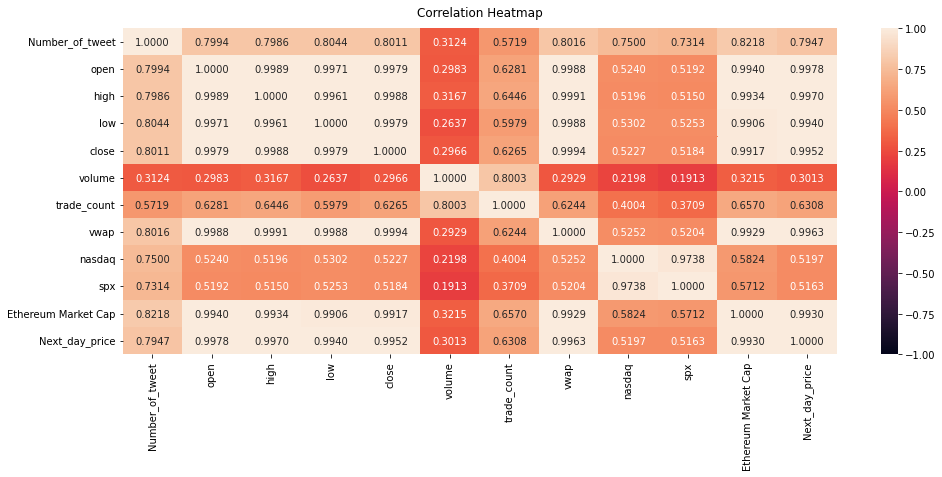

In [197]:
plt.figure(figsize=(16, 6))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(eth_df.corr(), vmin=-1, vmax=1, annot=True, fmt='.4f')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [198]:
eth2_df = eth_df.copy()

In [199]:
eth2_df = eth2_df[['close', 'vwap', 'Ethereum Market Cap', 'Number_of_tweet', 'trade_count']]

In [200]:
display(eth2_df.head())
display(eth2_df.tail())

,close,vwap,Ethereum Market Cap,Number_of_tweet,trade_count
Date,,,,,
2016-06-17,14.60,14.936590,1.249053e+09,37,359
2016-06-20,11.92,11.619042,9.596000e+08,9,616
2016-06-21,13.89,12.374604,1.055029e+09,10,1191
2016-06-22,13.31,13.292151,1.035382e+09,10,782
2016-06-24,14.60,14.570810,1.134161e+09,5,139


,close,vwap,Ethereum Market Cap,Number_of_tweet,trade_count
Date,,,,,
2021-02-04,1597.55,1626.726611,1.890240e+11,215,258811
2021-02-05,1662.98,1687.253385,1.839820e+11,252,94388
2021-02-08,1745.70,1741.436690,1.841090e+11,275,70894
2021-02-09,1801.61,1798.404307,1.987190e+11,434,82029
2021-02-10,1742.93,1746.540140,2.031030e+11,288,201821


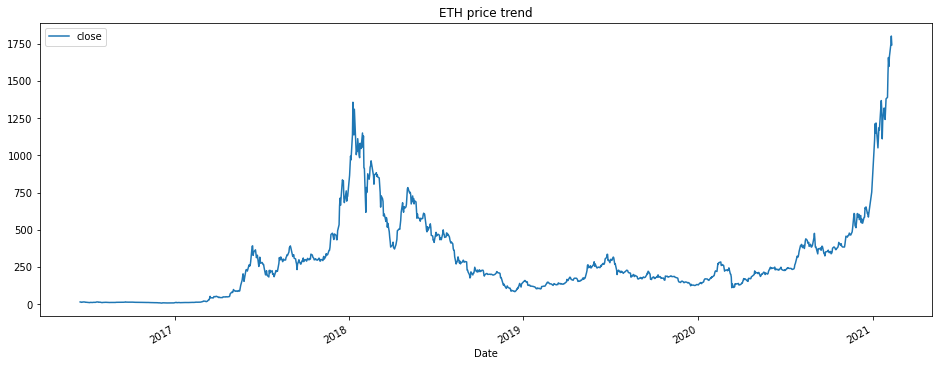

In [201]:
eth2_df.reset_index().plot(figsize=(16, 6), x='Date', y='close', title='ETH price trend')

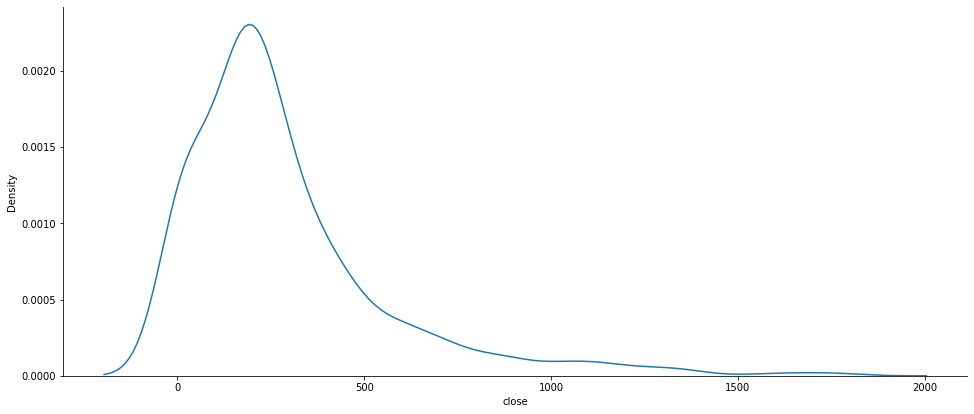

In [202]:
g = sns.displot(eth2_df['close'], kind='kde')
g.fig.set_size_inches(16,6)

In [203]:
# The distribution is right-skewed. Determin the skewness of the closing price data

print(f"The dataset skewness is: {eth2_df['close'].skew()}")

The dataset skewness is: 2.0445016970559617


In [204]:
# The distribution is right-skewed.
# Will use log transform to make it a normal distribution

eth2_df['close_log'] = np.log(eth2_df['close'])
print(f"The dataset skewness after the log transform is: {eth2_df['close_log'].skew()}")

The dataset skewness after the log transform is: -0.9921656760999804


In [205]:
# Will use sqrt transform to make it a normal distribution

eth2_df['close_sqrt'] = np.sqrt(eth2_df['close'])
print(f"The dataset skewness after the square root transform is: {eth2_df['close_sqrt'].skew()}")

The dataset skewness after the square root transform is: 0.49678498604893945


In [206]:
# Will use cube root transform to make it a normal distribution

eth2_df['Number_of_tweet_cbrt'] = np.cbrt(eth2_df['Number_of_tweet'])
eth2_df['trade_count_cbrt'] = np.cbrt(eth2_df['trade_count'])
eth2_df['Ethereum Market Cap_cbrt'] = np.cbrt(eth2_df['Ethereum Market Cap'])
eth2_df['close_cbrt'] = np.cbrt(eth2_df['close'])
eth2_df['vwap_cbrt'] = np.cbrt(eth2_df['vwap'])
print(f"The dataset skewness after the cube root transform is: {eth2_df['close_cbrt'].skew()}")

The dataset skewness after the cube root transform is: -0.05032418455981926


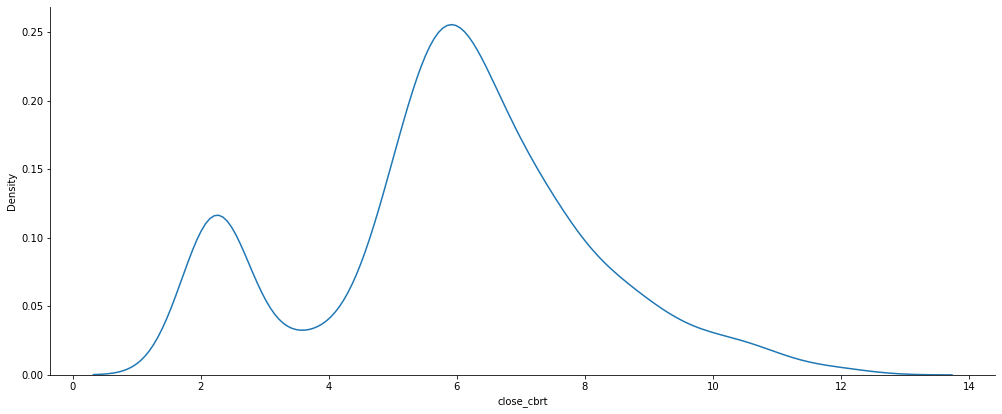

In [207]:
# Cube root transformation drops the skewness from  2.04 to -0.05. This is closest to a normal disctribution

g = sns.displot(eth2_df['close_cbrt'], kind='kde')
g.fig.set_size_inches(16,6)

In [208]:
eth2_df.reset_index(inplace=True)
eth2_df = eth2_df.drop(columns=['close', 'close_log', 'close_sqrt', 'vwap'])
eth2_df.head()

,Date,Ethereum Market Cap,Number_of_tweet,trade_count,Number_of_tweet_cbrt,trade_count_cbrt,Ethereum Market Cap_cbrt,close_cbrt,vwap_cbrt
0,2016-06-17,1.249053e+09,37,359,3.332222,7.107194,1076.945363,2.444092,2.462732
1,2016-06-20,9.596000e+08,9,616,2.080084,8.508642,986.347802,2.284330,2.264940
2,2016-06-21,1.055029e+09,10,1191,2.154435,10.599953,1018.016424,2.403813,2.313008
3,2016-06-22,1.035382e+09,10,782,2.154435,9.213025,1011.657719,2.369878,2.368818
4,2016-06-24,1.134161e+09,5,139,1.709976,5.180101,1042.857317,2.444092,2.442462


In [209]:
# Feature Engineering

eth2_df['lag_1'] = eth2_df['close_cbrt'].shift(1)
eth2_df['lag_2'] = eth2_df['close_cbrt'].shift(2)
eth2_df['lag_3'] = eth2_df['close_cbrt'].shift(3)
eth2_df['lag_4'] = eth2_df['close_cbrt'].shift(4)
eth2_df['lag_5'] = eth2_df['close_cbrt'].shift(5)
eth2_df['lag_6'] = eth2_df['close_cbrt'].shift(6)
eth2_df['lag_7'] = eth2_df['close_cbrt'].shift(7)

# eth2_df[['Date', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'close']].head(10)
eth2_df.head()

,Date,Ethereum Market Cap,Number_of_tweet,trade_count,Number_of_tweet_cbrt,trade_count_cbrt,Ethereum Market Cap_cbrt,close_cbrt,vwap_cbrt,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2016-06-17,1.249053e+09,37,359,3.332222,7.107194,1076.945363,2.444092,2.462732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-06-20,9.596000e+08,9,616,2.080084,8.508642,986.347802,2.284330,2.264940,2.444092,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-06-21,1.055029e+09,10,1191,2.154435,10.599953,1018.016424,2.403813,2.313008,2.284330,2.444092,NaN,NaN,NaN,NaN,NaN
3,2016-06-22,1.035382e+09,10,782,2.154435,9.213025,1011.657719,2.369878,2.368818,2.403813,2.284330,2.444092,NaN,NaN,NaN,NaN
4,2016-06-24,1.134161e+09,5,139,1.709976,5.180101,1042.857317,2.444092,2.442462,2.369878,2.403813,2.284330,2.444092,NaN,NaN,NaN


In [210]:
# Rolling window features

eth2_df['rolling_3_mean'] = eth2_df['close_cbrt'].rolling(window=3).mean()
eth2_df['rolling_4_mean'] = eth2_df['close_cbrt'].rolling(window=4).mean()
eth2_df['rolling_5_mean'] = eth2_df['close_cbrt'].rolling(window=5).mean()
eth2_df['rolling_6_mean'] = eth2_df['close_cbrt'].rolling(window=6).mean()
eth2_df['rolling_7_mean'] = eth2_df['close_cbrt'].rolling(window=7).mean()

In [211]:
display(eth2_df.head())
display(eth2_df.tail())

,Date,Ethereum Market Cap,Number_of_tweet,trade_count,Number_of_tweet_cbrt,trade_count_cbrt,Ethereum Market Cap_cbrt,close_cbrt,vwap_cbrt,lag_1,...,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_3_mean,rolling_4_mean,rolling_5_mean,rolling_6_mean,rolling_7_mean
0,2016-06-17,1.249053e+09,37,359,3.332222,7.107194,1076.945363,2.444092,2.462732,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-06-20,9.596000e+08,9,616,2.080084,8.508642,986.347802,2.284330,2.264940,2.444092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-06-21,1.055029e+09,10,1191,2.154435,10.599953,1018.016424,2.403813,2.313008,2.284330,...,NaN,NaN,NaN,NaN,NaN,2.377412,NaN,NaN,NaN,NaN
3,2016-06-22,1.035382e+09,10,782,2.154435,9.213025,1011.657719,2.369878,2.368818,2.403813,...,2.444092,NaN,NaN,NaN,NaN,2.352674,2.375528,NaN,NaN,NaN
4,2016-06-24,1.134161e+09,5,139,1.709976,5.180101,1042.857317,2.444092,2.442462,2.369878,...,2.284330,2.444092,NaN,NaN,NaN,2.405928,2.375528,2.389241,NaN,NaN


,Date,Ethereum Market Cap,Number_of_tweet,trade_count,Number_of_tweet_cbrt,trade_count_cbrt,Ethereum Market Cap_cbrt,close_cbrt,vwap_cbrt,lag_1,...,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_3_mean,rolling_4_mean,rolling_5_mean,rolling_6_mean,rolling_7_mean
1162,2021-02-04,1.890240e+11,215,258811,5.990726,63.727602,5739.036450,11.690098,11.760836,11.833606,...,11.158798,11.133013,10.928964,10.746142,10.875032,11.695013,11.560960,11.475370,11.384303,11.293137
1163,2021-02-05,1.839820e+11,252,94388,6.316360,45.530833,5687.548484,11.847563,11.904928,11.690098,...,11.561336,11.158798,11.133013,10.928964,10.746142,11.790422,11.733151,11.618280,11.537402,11.450483
1164,2021-02-08,1.841090e+11,275,70894,6.502957,41.387560,5688.856859,12.040833,12.031023,11.847563,...,11.833606,11.561336,11.158798,11.133013,10.928964,11.859498,11.853025,11.794687,11.688706,11.609321
1165,2021-02-09,1.987190e+11,434,82029,7.571174,43.449936,5835.523169,12.168030,12.160808,12.040833,...,11.690098,11.833606,11.561336,11.158798,11.133013,12.018808,11.936631,11.916026,11.856911,11.757181
1166,2021-02-10,2.031030e+11,288,201821,6.603854,58.657307,5878.124489,12.034461,12.042764,12.168030,...,11.847563,11.690098,11.833606,11.561336,11.158798,12.081108,12.022722,11.956197,11.935765,11.882275


In [212]:
# Expanding window features

eth2_df['expanding_2_mean'] = eth2_df['close_cbrt'].expanding(2).mean()
eth2_df['expanding_3_mean'] = eth2_df['close_cbrt'].expanding(3).mean()
eth2_df['expanding_4_mean'] = eth2_df['close_cbrt'].expanding(4).mean()

In [213]:
display(eth2_df.head())
display(eth2_df.tail())

,Date,Ethereum Market Cap,Number_of_tweet,trade_count,Number_of_tweet_cbrt,trade_count_cbrt,Ethereum Market Cap_cbrt,close_cbrt,vwap_cbrt,lag_1,...,lag_6,lag_7,rolling_3_mean,rolling_4_mean,rolling_5_mean,rolling_6_mean,rolling_7_mean,expanding_2_mean,expanding_3_mean,expanding_4_mean
0,2016-06-17,1.249053e+09,37,359,3.332222,7.107194,1076.945363,2.444092,2.462732,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-06-20,9.596000e+08,9,616,2.080084,8.508642,986.347802,2.284330,2.264940,2.444092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.364211,NaN,NaN
2,2016-06-21,1.055029e+09,10,1191,2.154435,10.599953,1018.016424,2.403813,2.313008,2.284330,...,NaN,NaN,2.377412,NaN,NaN,NaN,NaN,2.377412,2.377412,NaN
3,2016-06-22,1.035382e+09,10,782,2.154435,9.213025,1011.657719,2.369878,2.368818,2.403813,...,NaN,NaN,2.352674,2.375528,NaN,NaN,NaN,2.375528,2.375528,2.375528
4,2016-06-24,1.134161e+09,5,139,1.709976,5.180101,1042.857317,2.444092,2.442462,2.369878,...,NaN,NaN,2.405928,2.375528,2.389241,NaN,NaN,2.389241,2.389241,2.389241


,Date,Ethereum Market Cap,Number_of_tweet,trade_count,Number_of_tweet_cbrt,trade_count_cbrt,Ethereum Market Cap_cbrt,close_cbrt,vwap_cbrt,lag_1,...,lag_6,lag_7,rolling_3_mean,rolling_4_mean,rolling_5_mean,rolling_6_mean,rolling_7_mean,expanding_2_mean,expanding_3_mean,expanding_4_mean
1162,2021-02-04,1.890240e+11,215,258811,5.990726,63.727602,5739.036450,11.690098,11.760836,11.833606,...,10.746142,10.875032,11.695013,11.560960,11.475370,11.384303,11.293137,5.891859,5.891859,5.891859
1163,2021-02-05,1.839820e+11,252,94388,6.316360,45.530833,5687.548484,11.847563,11.904928,11.690098,...,10.928964,10.746142,11.790422,11.733151,11.618280,11.537402,11.450483,5.896976,5.896976,5.896976
1164,2021-02-08,1.841090e+11,275,70894,6.502957,41.387560,5688.856859,12.040833,12.031023,11.847563,...,11.133013,10.928964,11.859498,11.853025,11.794687,11.688706,11.609321,5.902250,5.902250,5.902250
1165,2021-02-09,1.987190e+11,434,82029,7.571174,43.449936,5835.523169,12.168030,12.160808,12.040833,...,11.158798,11.133013,12.018808,11.936631,11.916026,11.856911,11.757181,5.907623,5.907623,5.907623
1166,2021-02-10,2.031030e+11,288,201821,6.603854,58.657307,5878.124489,12.034461,12.042764,12.168030,...,11.561336,11.158798,12.081108,12.022722,11.956197,11.935765,11.882275,5.912874,5.912874,5.912874


In [214]:
eth2_df = eth2_df.sort_values(by=['Date'], ascending=False).reset_index(drop=True)
eth2_df['tomorrow_close_cbrt'] = eth2_df['close_cbrt'].shift(1)

In [215]:
display(eth2_df.head())
display(eth2_df.tail())

,Date,Ethereum Market Cap,Number_of_tweet,trade_count,Number_of_tweet_cbrt,trade_count_cbrt,Ethereum Market Cap_cbrt,close_cbrt,vwap_cbrt,lag_1,...,lag_7,rolling_3_mean,rolling_4_mean,rolling_5_mean,rolling_6_mean,rolling_7_mean,expanding_2_mean,expanding_3_mean,expanding_4_mean,tomorrow_close_cbrt
0,2021-02-10,2.031030e+11,288,201821,6.603854,58.657307,5878.124489,12.034461,12.042764,12.168030,...,11.158798,12.081108,12.022722,11.956197,11.935765,11.882275,5.912874,5.912874,5.912874,NaN
1,2021-02-09,1.987190e+11,434,82029,7.571174,43.449936,5835.523169,12.168030,12.160808,12.040833,...,11.133013,12.018808,11.936631,11.916026,11.856911,11.757181,5.907623,5.907623,5.907623,12.034461
2,2021-02-08,1.841090e+11,275,70894,6.502957,41.387560,5688.856859,12.040833,12.031023,11.847563,...,10.928964,11.859498,11.853025,11.794687,11.688706,11.609321,5.902250,5.902250,5.902250,12.168030
3,2021-02-05,1.839820e+11,252,94388,6.316360,45.530833,5687.548484,11.847563,11.904928,11.690098,...,10.746142,11.790422,11.733151,11.618280,11.537402,11.450483,5.896976,5.896976,5.896976,12.040833
4,2021-02-04,1.890240e+11,215,258811,5.990726,63.727602,5739.036450,11.690098,11.760836,11.833606,...,10.875032,11.695013,11.560960,11.475370,11.384303,11.293137,5.891859,5.891859,5.891859,11.847563


,Date,Ethereum Market Cap,Number_of_tweet,trade_count,Number_of_tweet_cbrt,trade_count_cbrt,Ethereum Market Cap_cbrt,close_cbrt,vwap_cbrt,lag_1,...,lag_7,rolling_3_mean,rolling_4_mean,rolling_5_mean,rolling_6_mean,rolling_7_mean,expanding_2_mean,expanding_3_mean,expanding_4_mean,tomorrow_close_cbrt
1162,2016-06-24,1.134161e+09,5,139,1.709976,5.180101,1042.857317,2.444092,2.442462,2.369878,...,NaN,2.405928,2.375528,2.389241,NaN,NaN,2.389241,2.389241,2.389241,2.408420
1163,2016-06-22,1.035382e+09,10,782,2.154435,9.213025,1011.657719,2.369878,2.368818,2.403813,...,NaN,2.352674,2.375528,NaN,NaN,NaN,2.375528,2.375528,2.375528,2.444092
1164,2016-06-21,1.055029e+09,10,1191,2.154435,10.599953,1018.016424,2.403813,2.313008,2.284330,...,NaN,2.377412,NaN,NaN,NaN,NaN,2.377412,2.377412,NaN,2.369878
1165,2016-06-20,9.596000e+08,9,616,2.080084,8.508642,986.347802,2.284330,2.264940,2.444092,...,NaN,NaN,NaN,NaN,NaN,NaN,2.364211,NaN,NaN,2.403813
1166,2016-06-17,1.249053e+09,37,359,3.332222,7.107194,1076.945363,2.444092,2.462732,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.284330


In [216]:
eth2_df.dropna(inplace=True)

In [217]:
X = eth2_df[['Date', 'vwap_cbrt', 'Ethereum Market Cap_cbrt', 'Number_of_tweet_cbrt', 'trade_count_cbrt', 'close_cbrt',
             'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 
             'rolling_3_mean', 'rolling_4_mean', 'rolling_5_mean', 'rolling_6_mean', 'rolling_7_mean', 
             'expanding_2_mean', 'expanding_3_mean', 'expanding_4_mean']
           ]

y = eth2_df[['Date', 'tomorrow_close_cbrt']]

In [218]:
X_train = X.loc[(X.Date >= '2016-01-01') & (X.Date <= '2021-01-31')]
X_test = X.loc[X.Date >= '2021-02-01']
y_train = y.loc[(y.Date >= '2016-01-01') & (y.Date <= '2021-01-31')]
y_test = y.loc[y.Date >= '2021-02-01']
y_test_actual = y_test.copy()
y_test_actual.tomorrow_close_cbrt = y_test_actual.tomorrow_close_cbrt ** 3
y_test_actual

,Date,tomorrow_close_cbrt
1,2021-02-09,1742.93
2,2021-02-08,1801.61
3,2021-02-05,1745.70
4,2021-02-04,1662.98
5,2021-02-03,1597.55
6,2021-02-02,1657.11
7,2021-02-01,1545.34


In [219]:
X_train.set_index('Date', inplace=True)
X_test.set_index('Date', inplace=True)
y_train.set_index('Date', inplace=True)
y_test.set_index('Date', inplace=True)
y_test_actual.set_index('Date', inplace=True)

In [220]:
# Linear Regression model

reg = LinearRegression()

In [221]:
reg.fit(X_train, y_train)

LinearRegression()

In [222]:
y_pred = reg.predict(X_test)

In [223]:
def mean_absolute_percentage_error(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [224]:
def mean_absolute_error(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [225]:
def root_mean_squared_error(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

In [226]:
lr_mape = mean_absolute_percentage_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = root_mean_squared_error(y_test, y_pred)
print(lr_mape)
print(lr_mae)
print(lr_rmse)

1.5510641286721258
0.18294694577561468
0.2107395659121914


In [227]:
y_pred_df = pd.DataFrame(y_pred, columns = ['price_pred'])
y_pred_df.set_index(y_test.index, inplace=True)
y_pred_df.price_pred = y_pred_df.price_pred ** 3

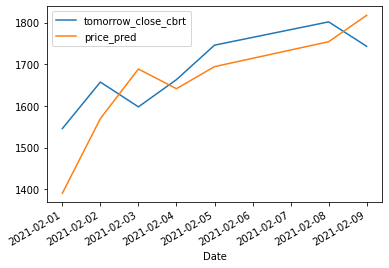

In [228]:
ax = y_test_actual.plot()
y_pred_df.plot(ax=ax)

In [229]:
# Random Forest model

rf = RandomForestRegressor()

In [230]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [231]:
y_pred = rf.predict(X_test)

In [232]:
rf_mape = mean_absolute_percentage_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = root_mean_squared_error(y_test, y_pred)
print(rf_mape)
print(rf_mae)
print(rf_rmse)

8.69148158046765
1.03575725266021
1.055884054403515


In [233]:
y_pred_df = pd.DataFrame(y_pred, columns = ['price_pred'])
y_pred_df.set_index(y_test.index, inplace=True)
y_pred_df.price_pred = y_pred_df.price_pred ** 3

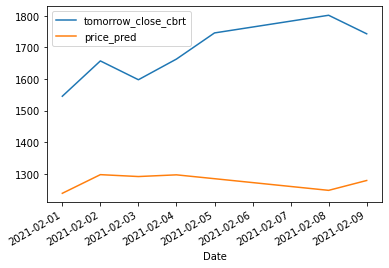

In [234]:
ax = y_test_actual.plot()
y_pred_df.plot(ax=ax)

In [235]:
# XGBoost model

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)

In [236]:
xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[16:55:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:5.34745	validation_1-mae:11.2924
[1]	validation_0-mae:5.29425	validation_1-mae:11.2034
[2]	validation_0-mae:5.24158	validation_1-mae:11.1153
[3]	validation_0-mae:5.18943	validation_1-mae:11.0281
[4]	validation_0-mae:5.13784	validation_1-mae:10.9403
[5]	validation_0-mae:5.08672	validation_1-mae:10.8548
[6]	validation_0-mae:5.03615	validation_1-mae:10.7687
[7]	validation_0-mae:4.98609	validation_1-mae:10.6822
[8]	validation_0-mae:4.93652	validation_1-mae:10.5979
[9]	validation_0-mae:4.88741	validation_1-mae:10.5156
[10]	validation_0-mae:4.83883	validation_1-mae:10.4303
[11]	validation_0-mae:4.79072	validation_1-mae:10.3484
[12]	validation_0-mae:4.74311	validation_1-mae:10.2661
[13]	validation_0-mae:4.69592	validation_1-mae:10.187
[14]	validation_0-mae:4.64925	validation_1-mae:10.1049
[15]	validation_0-mae:4.60306	validation_1-mae:10.0236
[16]

XGBRegressor(learning_rate=0.01, n_estimators=1000)

In [237]:
y_pred = xgb.predict(X_test)
y_pred

array([10.944336, 10.899624, 11.059605, 11.020901, 11.042141, 11.059605,
       10.881794], dtype=float32)

In [238]:
xgb_mape = mean_absolute_percentage_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = root_mean_squared_error(y_test, y_pred)
print(xgb_mape)
print(xgb_mae)
print(xgb_rmse)

7.510067877449865
0.8954173898526755
0.919946362652919


In [239]:
y_pred_df = pd.DataFrame(y_pred, columns = ['price_pred'])
y_pred_df.set_index(y_test.index, inplace=True)
y_pred_df.price_pred = y_pred_df.price_pred ** 3
# y_pred_df

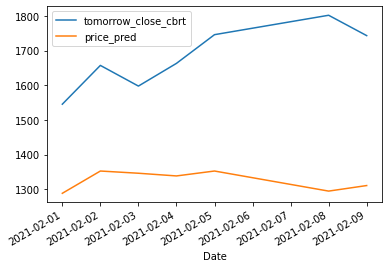

In [240]:
ax = y_test_actual.plot()
y_pred_df.plot(ax=ax)

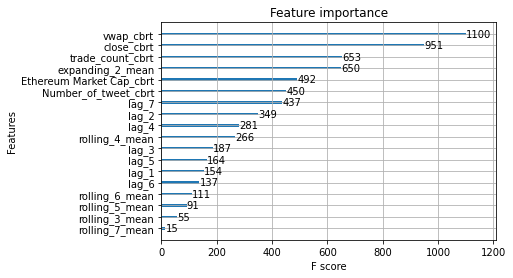

In [241]:
plot_importance(xgb);

In [242]:
X_train_subset = X_train.copy()
X_train_subset = X_train_subset[['vwap_cbrt', 'trade_count_cbrt', 'expanding_2_mean', 'Number_of_tweet_cbrt', 'Ethereum Market Cap_cbrt']]
X_train_subset

,vwap_cbrt,trade_count_cbrt,expanding_2_mean,Number_of_tweet_cbrt,Ethereum Market Cap_cbrt
Date,,,,,
2021-01-29,11.122922,63.657184,5.872294,5.677411,5347.047604
2021-01-28,11.010366,44.492403,5.867751,5.667051,5214.334218
2021-01-27,10.809230,61.674412,5.863377,5.013298,5376.844148
2021-01-26,10.965868,39.111886,5.859153,5.217103,5336.100994
2021-01-25,11.135289,58.165205,5.854810,5.451362,5408.024193
...,...,...,...,...,...
2016-07-06,2.198415,7.646027,2.333093,1.259921,950.624949
2016-07-05,2.184859,5.738794,2.345430,1.709976,951.410466
2016-07-01,2.302638,5.625226,2.359959,1.000000,1001.921327


In [243]:
X_test_subset = X_test.copy()
X_test_subset = X_test_subset[['vwap_cbrt', 'trade_count_cbrt', 'expanding_2_mean', 'Number_of_tweet_cbrt', 'Ethereum Market Cap_cbrt']]
y_train_subset = y_train.copy()
# y_train_subset = y_train_subset[['vwap_cbrt', 'trade_count_cbrt', 'expanding_2_mean', 'Number_of_tweet_cbrt', 'Ethereum Market Cap_cbrt']]
y_test_subset = y_test.copy()
# y_test_subset = y_test_subset[['vwap_cbrt', 'trade_count_cbrt', 'expanding_2_mean', 'Number_of_tweet_cbrt', 'Ethereum Market Cap_cbrt']]

In [244]:
# XGBoost model

xgb2 = XGBRegressor(n_estimators=1000, learning_rate=0.01)

In [245]:
xgb2.fit(X_train_subset, y_train_subset,
        eval_set=[(X_train_subset, y_train_subset), (X_test_subset, y_test_subset)],
        eval_metric='mae')

[16:55:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:5.34745	validation_1-mae:11.2921
[1]	validation_0-mae:5.29424	validation_1-mae:11.2028
[2]	validation_0-mae:5.24158	validation_1-mae:11.1145
[3]	validation_0-mae:5.18943	validation_1-mae:11.0269
[4]	validation_0-mae:5.13785	validation_1-mae:10.9384
[5]	validation_0-mae:5.08673	validation_1-mae:10.8526
[6]	validation_0-mae:5.03615	validation_1-mae:10.7658
[7]	validation_0-mae:4.98609	validation_1-mae:10.6794
[8]	validation_0-mae:4.93652	validation_1-mae:10.5961
[9]	validation_0-mae:4.88741	validation_1-mae:10.5138
[10]	validation_0-mae:4.83883	validation_1-mae:10.4292
[11]	validation_0-mae:4.79073	validation_1-mae:10.3455
[12]	validation_0-mae:4.74311	validation_1-mae:10.2654
[13]	validation_0-mae:4.69592	validation_1-mae:10.1863
[14]	validation_0-mae:4.64926	validation_1-mae:10.105
[15]	validation_0-mae:4.60305	validation_1-mae:10.0245
[16]

XGBRegressor(learning_rate=0.01, n_estimators=1000)

In [246]:
y_pred = xgb2.predict(X_test_subset)
y_pred

array([10.9329405, 10.811867 , 11.064345 , 10.998402 , 10.998402 ,
       11.077706 , 10.819317 ], dtype=float32)

In [247]:
xgb_mape = mape(y_test_subset, y_pred)
xgb_mae = mae(y_test_subset, y_pred)
xgb_rmse = rmse(y_test_subset, y_pred)
print(xgb_mape)
print(xgb_mae)
print(xgb_rmse)

7.756632726324293
0.9247067716973323
0.9507552471607612


In [248]:
y_pred_df = pd.DataFrame(y_pred, columns = ['price_pred'])
y_pred_df.set_index(y_test_subset.index, inplace=True)
y_pred_df.price_pred = y_pred_df.price_pred ** 3

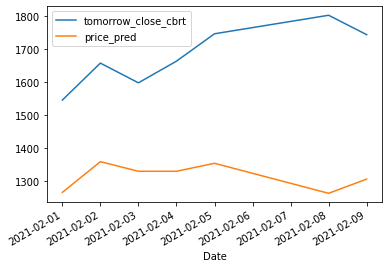

In [249]:
ax = y_test_actual.plot()
y_pred_df.plot(ax=ax)